In [1]:
from sklearn.base import ClassifierMixin
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
class LogisticRegression(ClassifierMixin):
    def __init__(self, max_iter=100):
        self.max_iter = max_iter
        
    def fit(self, X, y):
        '''
        Fits logisitic regression by minimising cross entropy error function using iteratively 
        reweighted least squares method (Newton-Raphson) as described in Bishop 2006 PRML.
        Takes an NxM feature matrix and a Nx1 matrix of class labels and returns optimal 
        logistic regression weight vector.
        '''
        
        N, M = X.shape
        
        # add bias terms to X
        self.phi = self.add_bias(X)
        
        # initialse weight vector using random normal
        self.w = np.random.normal(size=(M+1,1), scale=0.1)
        
        # weight update iterations
        for i in range(self.max_iter):
            
            y_hat = self.log_sig(self.phi).reshape(-1)
            R = np.diag(y_hat*(1-y_hat))
            hessian = np.matmul(np.matmul(self.phi.T, R), self.phi)
            try:
                inv_hessian = np.linalg.inv(hessian)
            except ArithmeticError:
                # linalg error in the case of near 0 hessian (no curvature) i.e. converged
                return self
            gradient = np.matmul(self.phi.T, y_hat-y).reshape(-1,1)
            
            # updates
            self.w = self.w - np.matmul(inv_hessian, gradient)
            
        return self
    
    def log_sig(self, phi):
        '''
        Applies logistic sigmoid function to data with bias term added
        '''
        logits = np.matmul(phi, self.w)   
        return 1/(1+np.exp(-logits))
    
    
    def predict_proba(self, X):
        '''
        Gets output of logistic sigmoid for input data X i.e. p(y|x)
        '''
        X = self.add_bias(X)
        return self.log_sig(X)
    
    
    def predict(self, X):
        '''
        Returns most likely class according to p(y|x)
        '''
        proba = self.predict_proba(X)
        return np.where(proba > 0.5, 1, 0)
    
        
    def add_bias(self, X):
        '''
        Add bias column to data matrix
        '''
        N = X.shape[0]
        bias = np.ones((N, 1))
        return np.concatenate([bias, X], axis=1)
    
    if not hasattr(ClassifierMixin, 'score'):
        def score(self, X, y):
            y_hat = self.predict(X).reshape(y.shape)
            return (y==y_hat).sum()/len(y_hat)

In [3]:
X, y = make_classification(n_features=2, n_redundant=0)

In [4]:
lr = LogisticRegression().fit(X,y)

In [5]:
def plot_boundary(w):
    decision_boundary = []
    for i in [-100,100]:
        decision_boundary.append(-((w[0]/w[2])+(w[1]/w[2])*i))
    plt.plot([-100,100],decision_boundary, c='k')

In [6]:
def plot_proba(clf, xmin=-5, xmax=5, ymin=-5, ymax=5):
    xx = np.linspace(xmin, xmax, 100)
    yy = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xx, yy)
    Xfull = np.c_[xx.ravel(), yy.ravel()]
    probas = clf.predict_proba(Xfull)
    plt.imshow(probas.reshape(100,100), extent=(xmin, xmax, ymin, ymax), origin='lower', cmap='coolwarm', interpolation='bicubic')

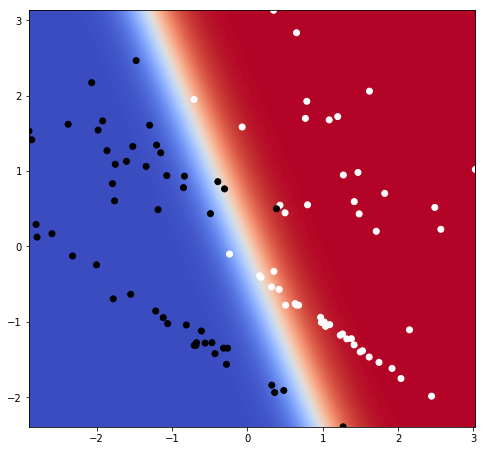

In [7]:
plt.figure(figsize=(8,8))
#plot_boundary(lr.w)
plot_proba(lr)
plt.scatter(X[:,0],X[:,1], c=y, cmap='gray')
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())
plt.show()

In [8]:
lr.w #weights

array([[ 0.13018105],
       [ 5.46272227],
       [ 2.25502565]])

In [9]:
lr.score(X, y) #accuracy

0.95999999999999996